<a href="https://colab.research.google.com/github/sriva-e/Bayesian-Statistics/blob/main/Untitled4_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Loading the Data

In [ ]:
df = pd.read_csv('Harris_Case_Study_Trade_List_2023.txt', delimiter='\t')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13937 entries, 0 to 13936
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Stock ID                       13937 non-null  int64  
 1   Side                           13937 non-null  object 
 2   OrderID                        13937 non-null  int64  
 3   ReleasedDateLocal              13937 non-null  object 
 4   ReleaseID                      13937 non-null  object 
 5   OrderStartDateLocal            13937 non-null  object 
 6   OrderEndDateLocal              13937 non-null  object 
 7   TradeDate                      13937 non-null  object 
 8   AvgExecPrice                   13937 non-null  float64
 9   SharesExecuted                 13937 non-null  int64  
 10  TotalValue                     13937 non-null  float64
 11  OrderPercentMedianDailyVolume  13937 non-null  float64
 12  OrderPercentIntervalVolume     13829 non-null 

# Data Cleaning
## Before we move to EDA, we must clean the data first. Here we will look if we have any missing or duplicate values

### Check for missing values

In [ ]:
missing_data = df.isnull().mean() * 100
print(missing_data)

Stock ID                         0.000000
Side                             0.000000
OrderID                          0.000000
ReleasedDateLocal                0.000000
ReleaseID                        0.000000
OrderStartDateLocal              0.000000
OrderEndDateLocal                0.000000
TradeDate                        0.000000
AvgExecPrice                     0.000000
SharesExecuted                   0.000000
TotalValue                       0.000000
OrderPercentMedianDailyVolume    0.000000
OrderPercentIntervalVolume       0.774916
FiveDayWeightedAvgSpread         0.000000
SpreadCapture                    0.000000
AdjustedBenchmarkPrice           0.000000
RawCostPerShare                  0.000000
AdjCostPerShare                  0.782091
RawBPS                           0.000000
AdjCostBPS                       0.782091
AdjDollarCost                    0.782091
PreTradeImpactEstimate           1.226950
OrderValue                       0.000000
Provider                         0

There are missing values in our data, namely in features OrderPercentIntervalVolume, AdjCostBPS, AdjCostPerShare, AdjDollarCost and  PreTradeImpactEstimate

Let's investigate the rows which contains these missing values

In [ ]:
columns_with_missing_values = ['OrderPercentIntervalVolume', 'AdjCostBPS', 'AdjCostPerShare', 'AdjDollarCost', 'PreTradeImpactEstimate']
rows_with_missing_values = df[df[columns_with_missing_values].isnull().any(axis=1)]

In [ ]:
#These are the rows in our dataframe that contains missing values for the aforementioned features
rows_with_missing_values

Stock ID          Side  OrderID        ReleasedDateLocal     ReleaseID  \
1195        180  Buy            130297  2019-03-01 07:48:40.687  180.552js.2v   
1196        121  Buy            130298  2019-03-01 07:48:40.700  121.552js.2w   
1197        230  Buy            130299  2019-03-01 07:48:40.733  230.552js.2x   
1198        303  Buy            130300  2019-03-01 07:48:40.763  303.552js.2y   
1199        305  Buy            130317  2019-03-01 09:30:23.540  305.552js.46   
...         ...           ...      ...                      ...           ...   
13738       121  Sell           223016  2021-05-17 11:20:46.090  121.hzyfy.6m   
13739       121  Sell           223018  2021-05-17 11:28:05.887  121.hzyfy.6p   
13760       120  Sell           223628  2021-05-21 08:01:07.667  120.i7d3v.3l   
13780       174  Sell           224255  2021-05-26 10:20:10.637  174.igmfs.7k   
13848       121  Sell           225674  2021-06-09 08:00:10.497  121.j6js8.38   

           OrderStartDateLocal        OrderEndDateLocal   TradeDate  \
1195   2019-03-01 07:48:40.000  2019-03-01 09:30:00.000  2019-03-01   
1196   2019-03-01 07:48:40.000  2019-03-01 09:52:44.923  2019-03-01   
1197   2019-03-01 07:48:40.000  2019-03-01 09:49:06.000  2019-03-01   
1198   2019-03-01 07:48:40.000  2019-03-01 09:30:06.453  2019-03-01   
1199   2019-03-01 09:30:23.000  2019-03-01 10:47:00.810  2019-03-01   
...                        ...                      ...         ...   
13738  2021-05-17 11:20:42.000  2021-05-17 11:24:19.353  2021-05-17   
13739  2021-05-17 11:27:48.000  2021-05-17 15:59:38.960  2021-05-17   
13760  2021-05-21 08:00:29.000  2021-05-21 16:00:03.220  2021-05-21   
13780  2021-05-26 10:20:06.000  2021-05-26 16:00:03.897  2021-05-26   
13848  2021-06-09 08:00:10.000  2021-06-09 15:59:11.600  2021-06-09   

       AvgExecPrice  SharesExecuted  ...  AdjustedBenchmarkPrice  \
1195       172.2900             190  ...              172.296570   
1196        26.5289            2700  ...               26.542319   
1197        77.4265            1000  ...               77.316796   
1198       164.4615             265  ...              164.674133   
1199       102.6953            1923  ...              102.310000   
...             ...             ...  ...                     ...   
13738       28.4750             200  ...               28.500000   
13739       28.1324           29800  ...               28.450000   
13760       27.4593           31198  ...               27.706949   
13780       82.3200            6100  ...               81.910000   
13848       27.6380           28800  ...               27.509783   

       RawCostPerShare  AdjCostPerShare    RawBPS  AdjCostBPS  AdjDollarCost  \
1195            0.0066              NaN    0.3813         NaN            NaN   
1196            0.0134              NaN    5.0529         NaN            NaN   
1197           -0.1097              NaN  -14.1889         NaN            NaN   
1198            0.2126              NaN   12.9118         NaN            NaN   
1199           -0.3853              NaN  -37.6577         NaN            NaN   
...                ...              ...       ...         ...            ...   
13738          -0.0250          -0.0212   -8.7719     -7.4433      -4.242668   
13739          -0.3176          -0.2941 -111.6343   -103.3897   -8765.480047   
13760          -0.2476          -0.2043  -89.3727    -73.7245   -6372.755679   
13780           0.4100           0.5464   50.0489     66.7066    3333.004372   
13848           0.1282           0.1505   46.6191     54.7029    4334.014396   

       PreTradeImpactEstimate    OrderValue  Provider  Auto or Human Trader  
1195                      NaN   32736.34830  Broker 8                 Human  
1196                      NaN   71664.26130  Broker 3                 Human  
1197                      NaN   77316.79600  Broker 2                 Human  
1198                      NaN   43638.64525  Broker 4                 Human  
1199         

Out of 13937 rows , we have 279 rows that contains missing values in one or more of the features OrderPercentIntervalVolume, AdjCostBPS, AdjCostPerShare, AdjDollarCost and  PreTradeImpactEstimate.
Let's plot the distribution of these missing values over time to see if we can catch any significant information.

/tmp/ipykernel_31362/4164786370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_missing_values['ReleasedDateLocal'] = pd.to_datetime(rows_with_missing_values['ReleasedDateLocal'])
/tmp/ipykernel_31362/4164786370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_missing_values['OrderStartDateLocal'] = pd.to_datetime(rows_with_missing_values['OrderStartDateLocal'])
/tmp/ipykernel_31362/4164786370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

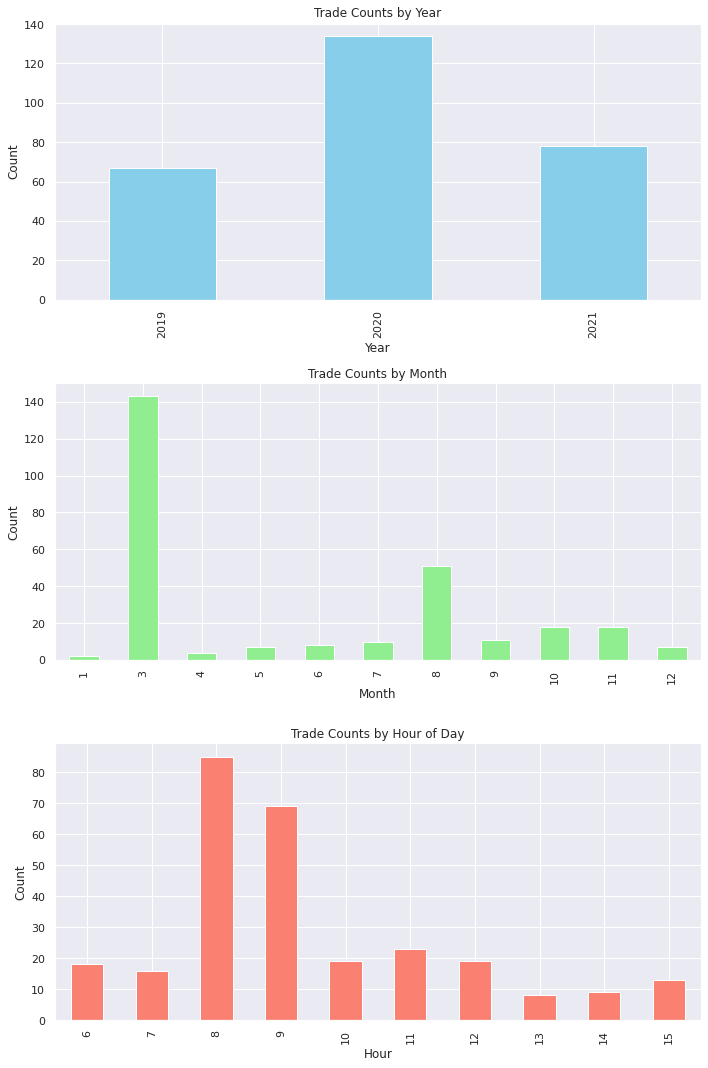

In [ ]:
# Convert time-related columns to datetime objects
rows_with_missing_values['ReleasedDateLocal'] = pd.to_datetime(rows_with_missing_values['ReleasedDateLocal'])
rows_with_missing_values['OrderStartDateLocal'] = pd.to_datetime(rows_with_missing_values['OrderStartDateLocal'])
rows_with_missing_values['OrderEndDateLocal'] = pd.to_datetime(rows_with_missing_values['OrderEndDateLocal'])
rows_with_missing_values['TradeDate'] = pd.to_datetime(rows_with_missing_values['TradeDate'])

# Extracting year, month, and hour from the date-time columns
rows_with_missing_values['Year'] = rows_with_missing_values['TradeDate'].dt.year
rows_with_missing_values['Month'] = rows_with_missing_values['TradeDate'].dt.month
rows_with_missing_values['Hour'] = rows_with_missing_values['ReleasedDateLocal'].dt.hour

# Plotting the distribution of trades by Year, Month, and Hour
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Year distribution
rows_with_missing_values['Year'].value_counts().sort_index().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Trade Counts by Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Count')

# Month distribution
rows_with_missing_values['Month'].value_counts().sort_index().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Trade Counts by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Count')

# Hour distribution
rows_with_missing_values['Hour'].value_counts().sort_index().plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Trade Counts by Hour of Day')
axs[2].set_xlabel('Hour')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


1. Most missing values are seen in 2020, probably due to unpredictable nature of the market during pandemic
2. March seems to have a significant amount of missing values
3. Morning hours , from 8-10 have the most amount of missing data.

I will remove these rows for further analysis as we only have 279 missing values out of 13937,which is around 2% of our data,  this is not enough data to draw out any major conclusions to decide for sure if there's a pattern or if these missing values are systematic.

### Check for duplicates

In [ ]:
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicate_rows}")


Number of duplicate rows: 0


No duplicates present in the data, In the next step we'll perform data cleaning by removing the rows that contains missing values

In [ ]:
clean_df = df.dropna()


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13658 entries, 0 to 13936
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Stock ID                       13658 non-null  int64  
 1   Side                           13658 non-null  object 
 2   OrderID                        13658 non-null  int64  
 3   ReleasedDateLocal              13658 non-null  object 
 4   ReleaseID                      13658 non-null  object 
 5   OrderStartDateLocal            13658 non-null  object 
 6   OrderEndDateLocal              13658 non-null  object 
 7   TradeDate                      13658 non-null  object 
 8   AvgExecPrice                   13658 non-null  float64
 9   SharesExecuted                 13658 non-null  int64  
 10  TotalValue                     13658 non-null  float64
 11  OrderPercentMedianDailyVolume  13658 non-null  float64
 12  OrderPercentIntervalVolume     13658 non-null 

# Exploratory Data Analysis

In [ ]:
# Convert time-related columns to datetime objects
clean_df['ReleasedDateLocal'] = pd.to_datetime(clean_df['ReleasedDateLocal'])
clean_df['OrderStartDateLocal'] = pd.to_datetime(clean_df['OrderStartDateLocal'])
clean_df['OrderEndDateLocal'] = pd.to_datetime(clean_df['OrderEndDateLocal'])
clean_df['TradeDate'] = pd.to_datetime(clean_df['TradeDate'])

# Extracting year, month, and hour from the date-time columns
clean_df['Year'] = clean_df['TradeDate'].dt.year
clean_df['Month'] = clean_df['TradeDate'].dt.month
clean_df['Hour'] = clean_df['ReleasedDateLocal'].dt.hour

/tmp/ipykernel_31362/530277101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['ReleasedDateLocal'] = pd.to_datetime(clean_df['ReleasedDateLocal'])
/tmp/ipykernel_31362/530277101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['OrderStartDateLocal'] = pd.to_datetime(clean_df['OrderStartDateLocal'])
/tmp/ipykernel_31362/530277101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13658 entries, 0 to 13936
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Stock ID                       13658 non-null  int64         
 1   Side                           13658 non-null  object        
 2   OrderID                        13658 non-null  int64         
 3   ReleasedDateLocal              13658 non-null  datetime64[ns]
 4   ReleaseID                      13658 non-null  object        
 5   OrderStartDateLocal            13658 non-null  datetime64[ns]
 6   OrderEndDateLocal              13658 non-null  datetime64[ns]
 7   TradeDate                      13658 non-null  datetime64[ns]
 8   AvgExecPrice                   13658 non-null  float64       
 9   SharesExecuted                 13658 non-null  int64         
 10  TotalValue                     13658 non-null  float64       
 11  OrderPercentMed

We have converted time related columns to date-time objects and extracted extra three features Year, Month and Hour.

Let's look more into the kind of features we have, from the above output it is clear that we have , categorical features(object data type), numerical features( int and float data types) and our newly created date-time feature(datetime data type). At this stage we'll look into our categorical features, numerical features and how they interact with each other

### Categorical Features

In [ ]:
categorical_columns = clean_df.select_dtypes(include=['object']).columns

In [ ]:
print(categorical_columns)

Index(['Side', 'ReleaseID', 'Provider', 'Auto or Human Trader'], dtype='object')


We have mainly three categorical features of interest namely, **Side, Provider and Auto or Human Trader**


In [ ]:
#Number of unique categories in each of these features
print(clean_df['Provider'].unique())
print(clean_df['Side'].unique())
print(clean_df['Auto or Human Trader'].unique())

['Broker 4' 'Broker 1' 'Broker 5' 'Broker 9' 'Broker 3' 'Broker 8'
 'Broker 2' 'Broker 7' 'Broker 6' 'Broker 10']
['Buy         ' 'Sell        ']
['Human']


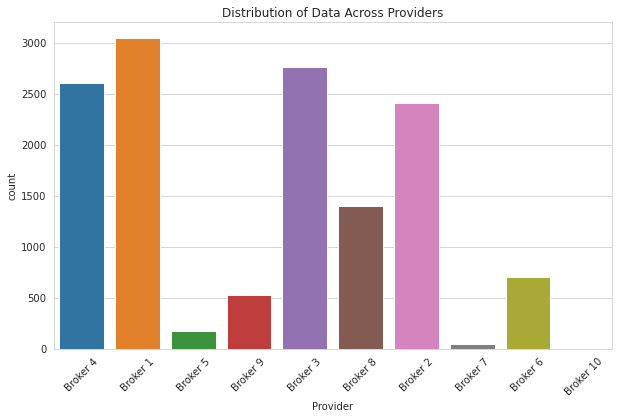

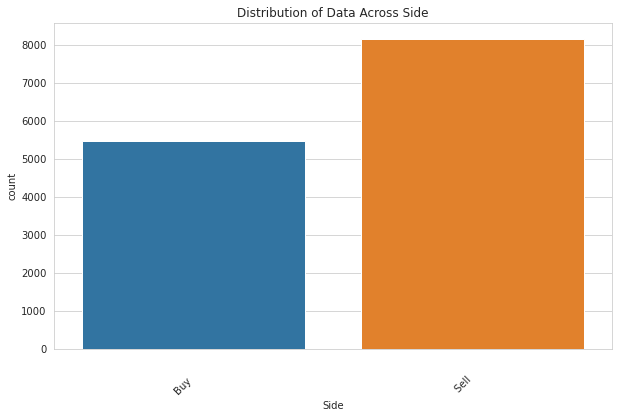

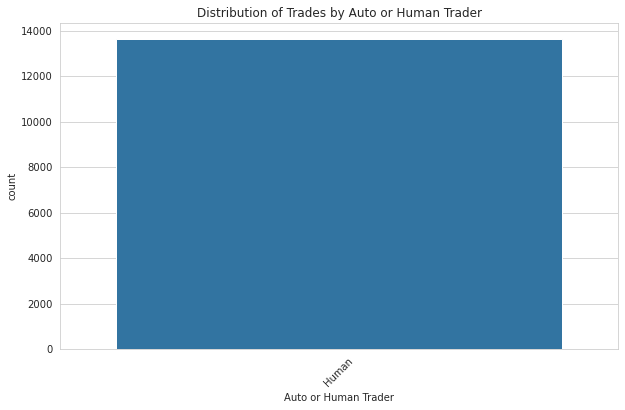

In [ ]:
#Let's plot the occurance of each category in our dataset
sns.set_style("whitegrid")

# For 'Provider' column
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x='Provider')
plt.title('Distribution of Data Across Providers')
plt.xticks(rotation=45)  # Rotates the x labels to avoid overlap, if necessary
plt.show()

# For 'Side' column
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x='Side')
plt.title('Distribution of Data Across Side')
plt.xticks(rotation=45)
plt.show()

# For 'Auto or Human Trader' column
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x='Auto or Human Trader')
plt.title('Distribution of Trades by Auto or Human Trader')
plt.xticks(rotation=45)
plt.show()

# Add percentages

1. The data contains informations for only Human Trader not Auto
2. More Sell side data than buy side
3. Broker 1, Broker 2, Broker 3, Broker 4 have the most amount of trade count in the data

So as we can see we have only 2 categorical features that have unique categories, **Provider and Side**


Let's see how the categories Provider and Side, **interact** with each other. i.e we'll see how much on both sides do our brokers trade?

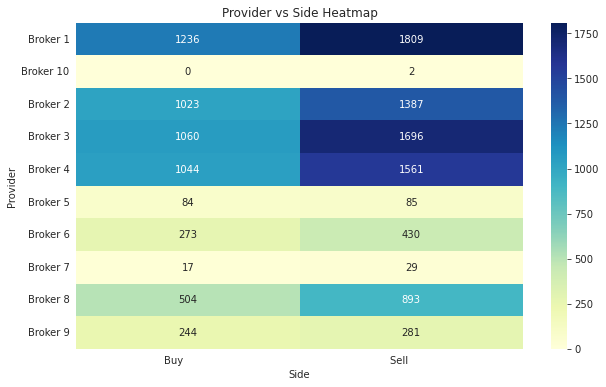

In [ ]:
plt.figure(figsize=(10, 6))
provider_side_crosstab = pd.crosstab(clean_df['Provider'], clean_df['Side'])
sns.heatmap(provider_side_crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Provider vs Side Heatmap')
plt.show()

# Add percentages

This table provides us the distribution of the side by each broker, The brokers in the firm are biased towards the sell side, i.e they sell more stocks than they buy

### Analysis of Numerical Features

In [ ]:
numerical_columns = clean_df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
print(numerical_columns)

Index(['Stock ID', 'OrderID', 'AvgExecPrice', 'SharesExecuted', 'TotalValue',
       'OrderPercentMedianDailyVolume', 'OrderPercentIntervalVolume',
       'FiveDayWeightedAvgSpread', 'SpreadCapture', 'AdjustedBenchmarkPrice',
       'RawCostPerShare', 'AdjCostPerShare', 'RawBPS', 'AdjCostBPS',
       'AdjDollarCost', 'PreTradeImpactEstimate', 'OrderValue', 'Year',
       'Month', 'Hour'],
      dtype='object')


In [ ]:
descriptive_stats = clean_df.describe()

In [ ]:
descriptive_stats

Stock ID        OrderID  AvgExecPrice  SharesExecuted  \
count  13658.000000   13658.000000  13658.000000    1.365800e+04   
mean     213.359862  162564.358325    135.745725    2.020866e+04   
std       72.161225   25949.295265    284.367471    6.751653e+04   
min      100.000000  123902.000000      0.263000    2.000000e+00   
25%      142.250000  141115.250000     29.373200    2.000000e+03   
50%      213.000000  159844.500000     52.004150    5.025000e+03   
75%      266.000000  178358.750000    111.557075    1.578975e+04   
max      334.000000  228064.000000   2522.256400    2.247000e+06   

         TotalValue  OrderPercentMedianDailyVolume  \
count  1.365800e+04                   13658.000000   
mean   1.230724e+06                       0.016092   
std    2.918451e+06                       0.073957   
min    1.260000e+02                       0.000001   
25%    1.121312e+05                       0.000592   
50%    3.066238e+05                       0.002380   
75%    9.756169e+05                       0.010107   
max    6.005573e+07                       3.762390   

       OrderPercentIntervalVolume  FiveDayWeightedAvgSpread  SpreadCapture  \
count                13658.000000              13658.000000   13658.000000   
mean                     0.146421                  0.000880       0.549557   
std                      2.055196                  0.000985       0.196911   
min                      0.000000                  0.000036       0.000000   
25%                      0.022330                  0.000304       0.460200   
50%                      0.034305                  0.000537       0.550450   
75%                      0.061000                  0.001042       0.672900   
max                    137.910448                  0.018052       1.000000   

       AdjustedBenchmarkPrice  RawCostPerShare  AdjCostPerShare        RawBPS  \
count            13658.000000     13658.000000     13658.000000  13658.000000   
mean               135.759263        -0.100030         0.066775     -9.627762   
std                284.348885         1.327141         2.911450     63.633045   
min                  0.263000       -32.439900       -42.204900  -1064.747700   
25%                 29.365606        -0.127900        -0.245200    -22.315675   
50%                 51.990000        -0.015000         0.001800     -3.439050   
75%                111.740000         0.042100         0.246075      8.226775   
max               2522.830000        58.504200        71.689700    953.721500   

         AdjCostBPS  AdjDollarCost  PreTradeImpactEstimate    OrderValue  \
count  13658.000000   13658.000000            13658.000000  1.365800e+04   
mean       0.598304     134.832730                4.792700  1.231843e+06   
std      148.121174   23914.624488                5.767001  2.922493e+06   
min    -2479.944100 -566782.583100                0.081200  1.260300e+02   
25%      -43.960925   -1323.330939                1.300500  1.121961e+05   
50%        0.451350       3.617507                2.698700  3.063699e+05   
75%       45.650425    1399.806791                5.957650  9.757919e+05   
max     1609.298700  604230.320500               68.243500  5.950206e+07   

               Year         Month          Hour  
count  13658.000000  13658.000000  13658.000000  
mean    2019.575267      5.553522     11.134793  
std        0.631432      3.329805      2.085295  
min     2019.000000      1.000000      6.000000  
25%     2019.000000      3.000000      9.000000  
50%     2019.000000      5.000000     11.000000  
75%     2020.000000      8.000000     13.000000  
max     2021.000000     12.000000     16.000000

The descriptive statistice suggests significant variability in trade executions price and volumes. We can see a high standard deviation for Average Execution Price and Total Value, this can indicate wide range in trading behaviors. Max value in AvgExecPrice and TotalValue, implies occasional **outlier trades with very high prices or volumes**. Additionally, the average SpreadCapture is notably high, and there are instances of negative costs per share, indicating the possibility of rebates or credits in certain trades.

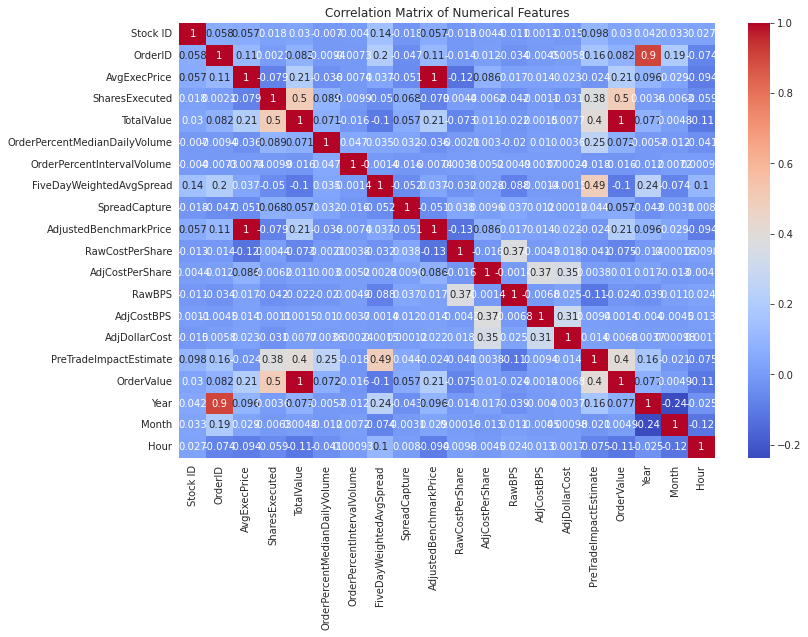

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(clean_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation plot indicates strong alignment between AvgExecPrice and the AdjustedBenchmarkPrice, indicating that **executed trades closely track benchmark pricing**. There's also a notable relationship between trade size and trade value, **larger trades generally leads to higher values**, this is consistent with the high variability in trade values observed in descriptive statistics.The negative correlation between AvgExecPrice and SharesExecuted could suggest **volume discounts in larger trades**, the positive correlations among adjusted cost metrics (AdjCostPerShare, AdjCostBPS, and AdjDollarCost) related to the findings from the descriptive analysis that **trading costs are a critical factor with considerable variance that requires close management**. The correlation between PreTradeImpactEstimate and FiveDayWeightedAvgSpread suggests that **anticipated trade impact and market conditions are interrelated, influencing spread and potentially trade strategy effectiveness**.

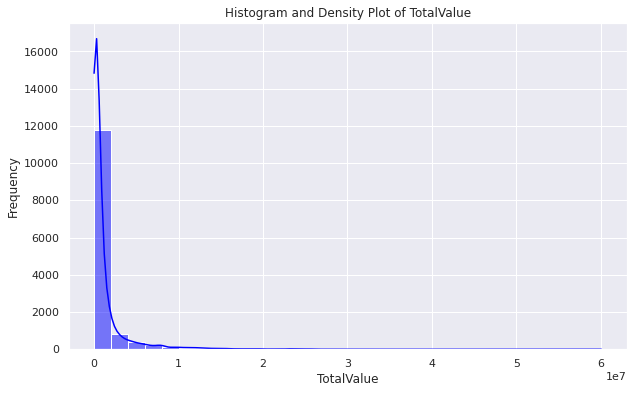

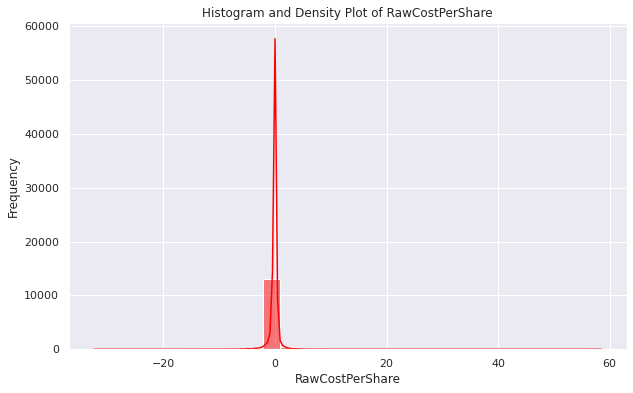

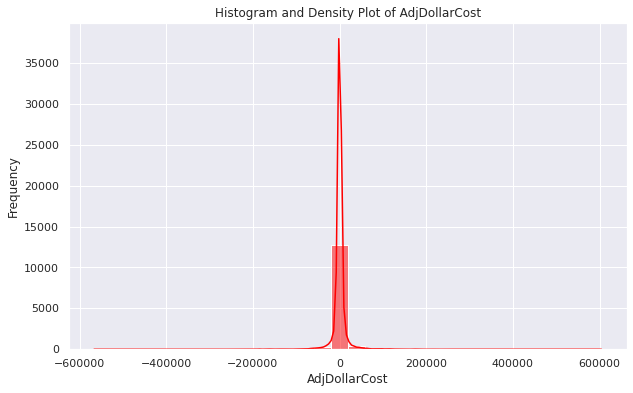

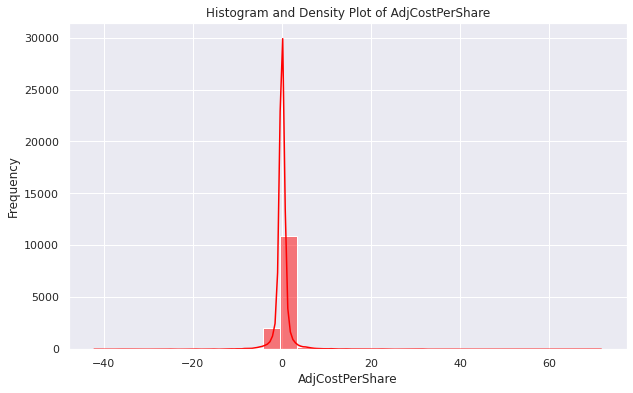

"plt.figure(figsize=(10, 6))\nsns.histplot(clean_df['Month'], kde=True, color='red', bins=30)\nplt.title('Histogram and Density Plot of Month')\nplt.xlabel('SpreadCapture')\nplt.ylabel('Frequency')\nplt.show()\n\nplt.figure(figsize=(10, 6))\nsns.histplot(clean_df['Hour'], kde=True, color='red', bins=30)\nplt.title('Histogram and Density Plot of Hour')\nplt.xlabel('SpreadCapture')\nplt.ylabel('Frequency')\nplt.show()\n\nplt.figure(figsize=(10, 6))\nsns.histplot(clean_df['RawBPS'], kde=True, color='red', bins=30)\nplt.title('Histogram and Density Plot of RawBPS')\nplt.xlabel('SpreadCapture')\nplt.ylabel('Frequency')\nplt.show()"

In [ ]:
# Density Plot for 'TotalValue'
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['TotalValue'], kde=True, color='blue', bins=30)
plt.title('Histogram and Density Plot of TotalValue')
plt.xlabel('TotalValue')
plt.ylabel('Frequency')
plt.show()
"""plt.figure(figsize=(10, 6))
sns.histplot(clean_df['OrderValue'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of OrderValue')
plt.xlabel('SpreadCapture')
plt.ylabel('Frequency')
plt.show()
# Density Plot for 'OrderPercentMedianDailyVolume'
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['OrderPercentMedianDailyVolume'], kde=True, color='green', bins=30)
plt.title('Histogram and Density Plot of OrderPercentMedianDailyVolume')
plt.xlabel('OrderPercentMedianDailyVolume')
plt.ylabel('Frequency')
plt.show()

# Density Plot for 'SpreadCapture'
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['SpreadCapture'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of SpreadCapture')
plt.xlabel('SpreadCapture')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(clean_df['SharesExecuted'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of SharesExecuted')
plt.xlabel('SpreadCapture')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(clean_df['FiveDayWeightedAvgSpread'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of FiveDayWeightedAvgSpread')
plt.xlabel('SpreadCapture')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(clean_df['PreTradeImpactEstimate'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of PreTradeImpactEstimate')
plt.xlabel('SpreadCapture')
plt.ylabel('Frequency')
plt.show()"""

plt.figure(figsize=(10, 6))
sns.histplot(clean_df['RawCostPerShare'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of RawCostPerShare')
plt.xlabel('RawCostPerShare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(clean_df['AdjDollarCost'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of AdjDollarCost')
plt.xlabel('AdjDollarCost')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(clean_df['AdjCostPerShare'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of AdjCostPerShare')
plt.xlabel('AdjCostPerShare')
plt.ylabel('Frequency')
plt.show()



"""plt.figure(figsize=(10, 6))
sns.histplot(clean_df['Month'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of Month')
plt.xlabel('SpreadCapture')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(clean_df['Hour'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of Hour')
plt.xlabel('SpreadCapture')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(clean_df['RawBPS'], kde=True, color='red', bins=30)
plt.title('Histogram and Density Plot of RawBPS')
plt.xlabel('SpreadCapture')
plt.ylabel('Frequency')
plt.show()"""



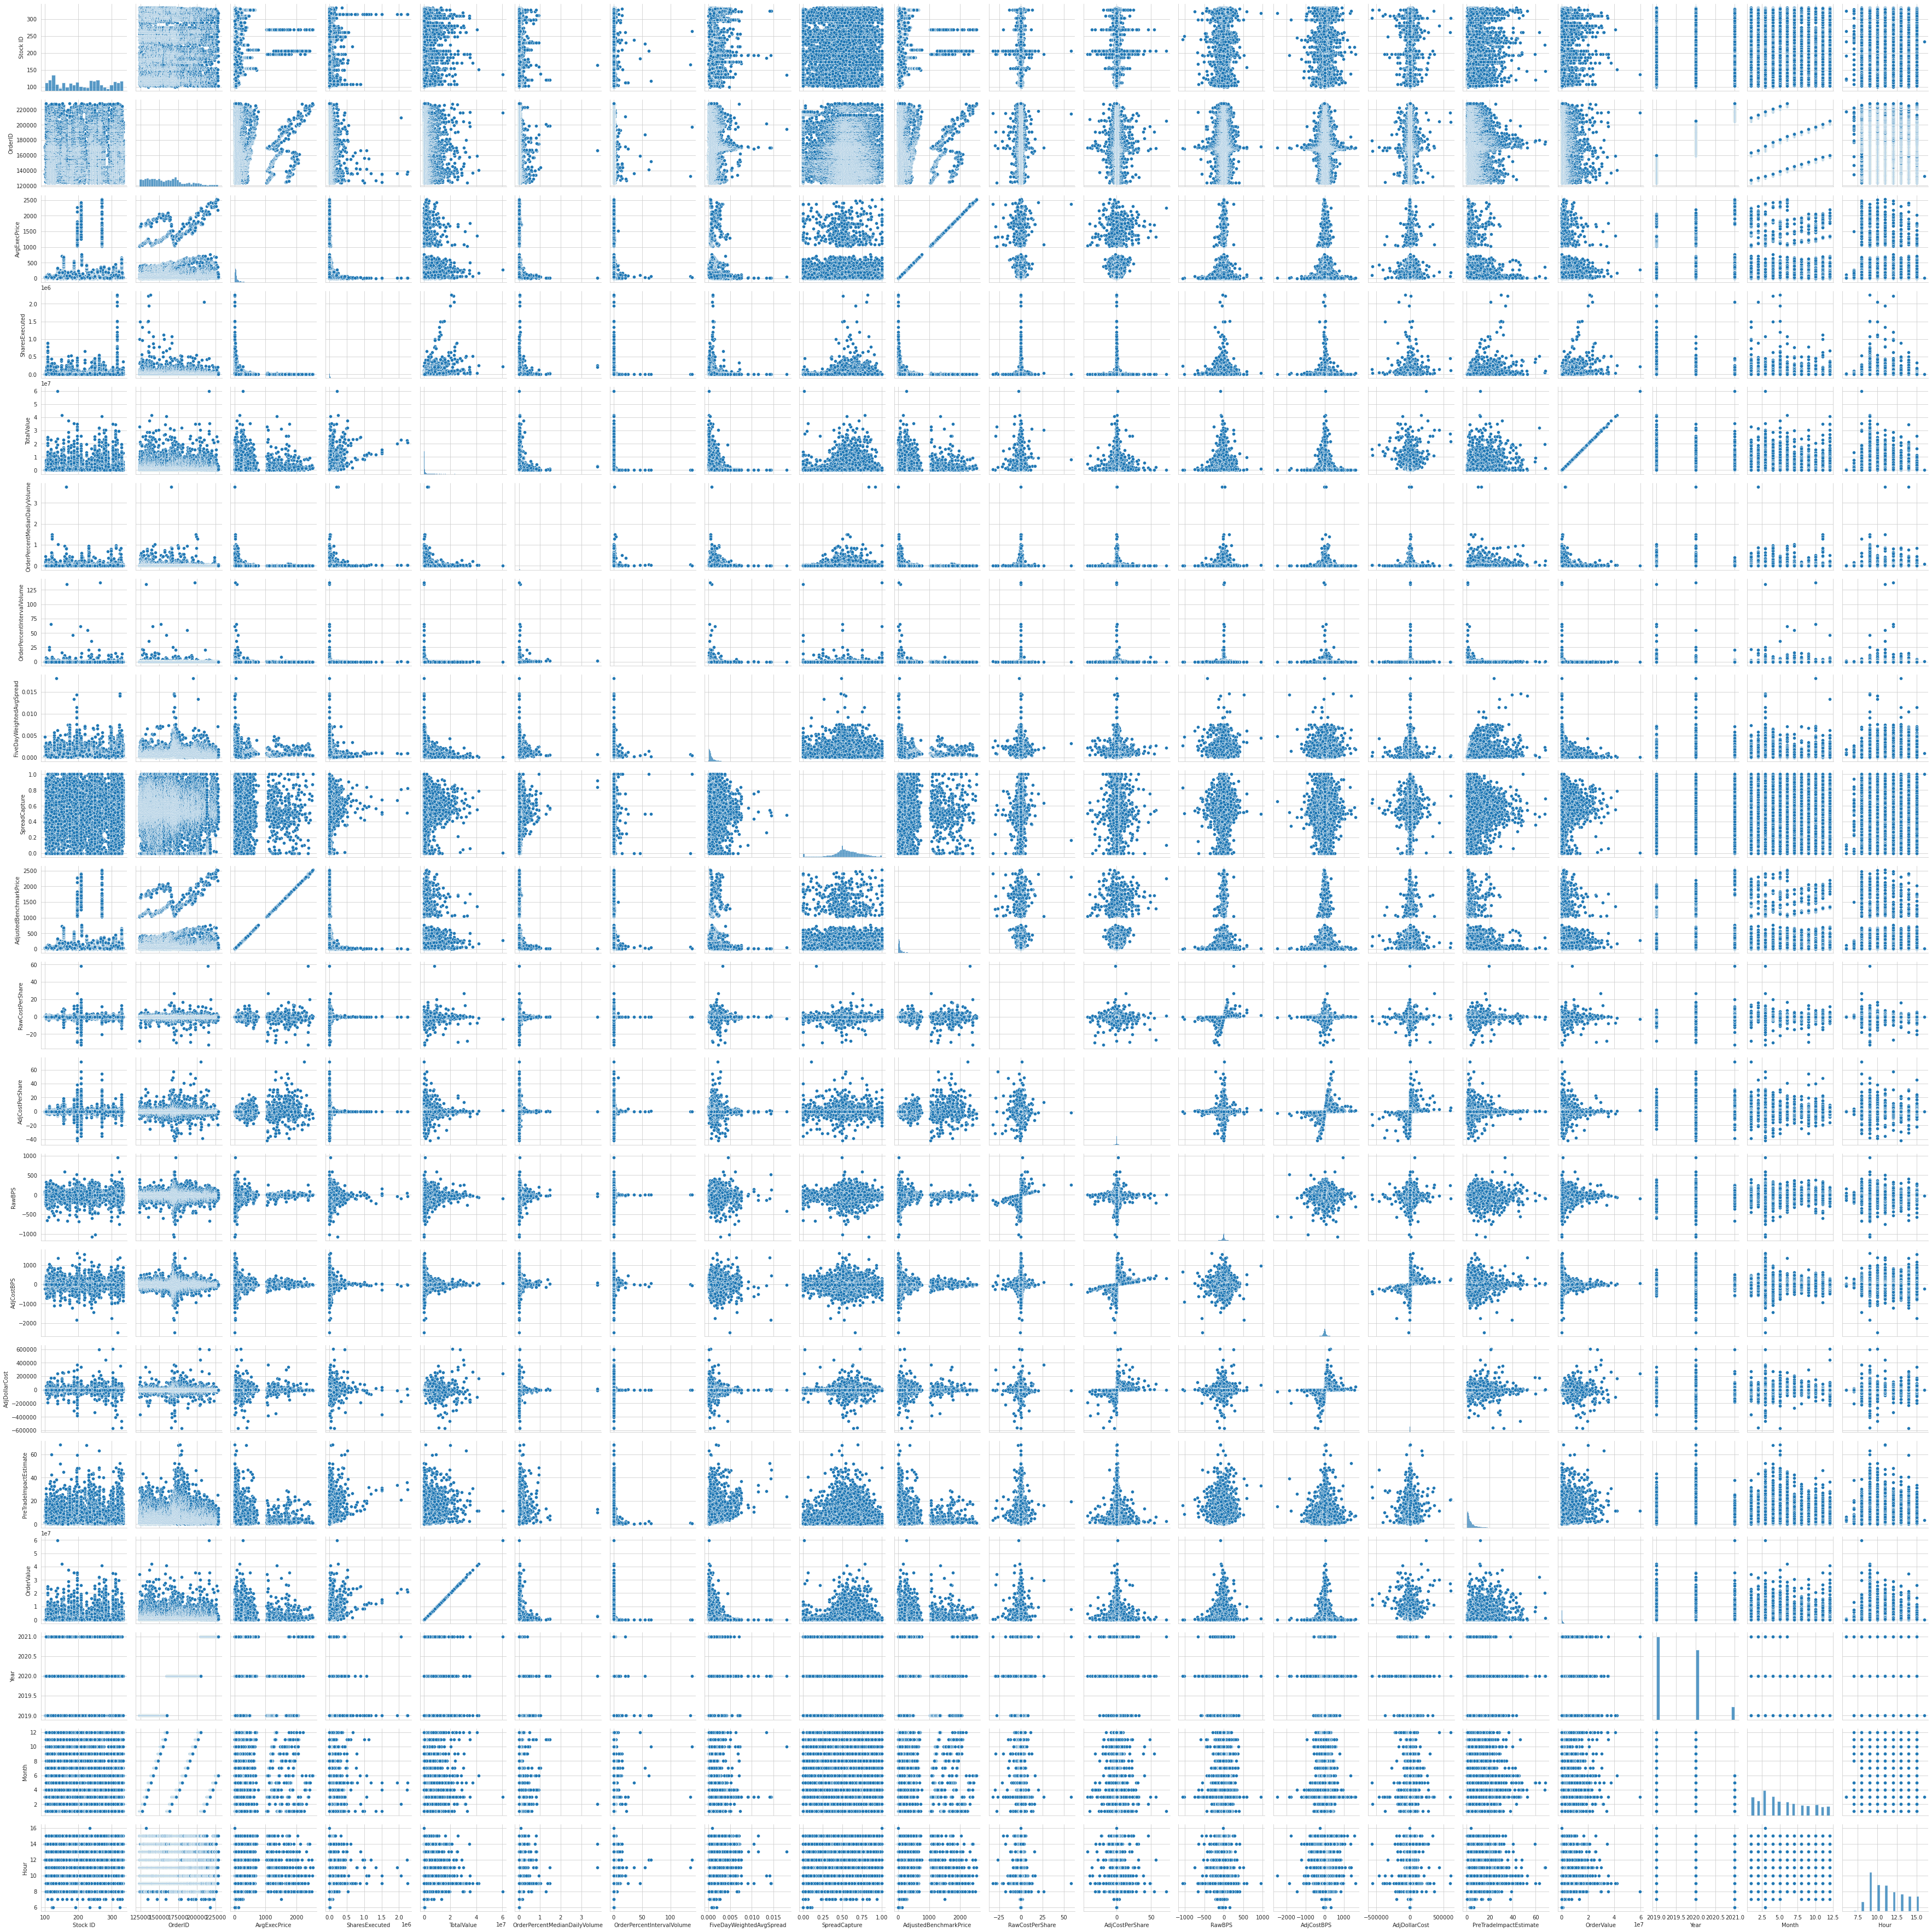

In [ ]:
numerical_df = clean_df.select_dtypes(include=['float64', 'int64'])

# Create a pairplot
g=sns.pairplot(numerical_df)

# Show the plot
#plt.show()
g.savefig('pairplot.png')


numerical features that make sense to me for the boxplot based on their meaning are AvgExecPrice, SharesExecuted,TotalValue,FiveDayWeightedAvgSpread and PreTradeImpactEstimate - you might have thought about it but can expand on this an add points


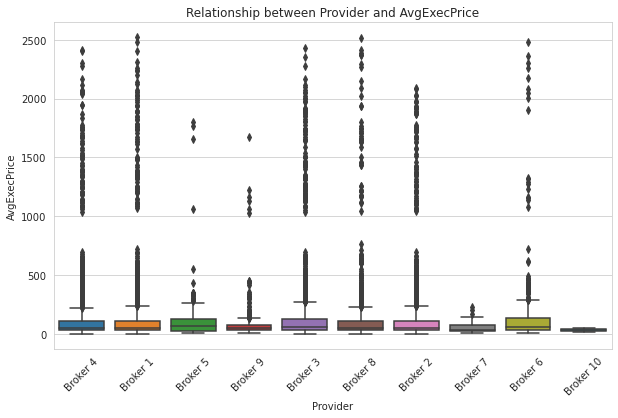

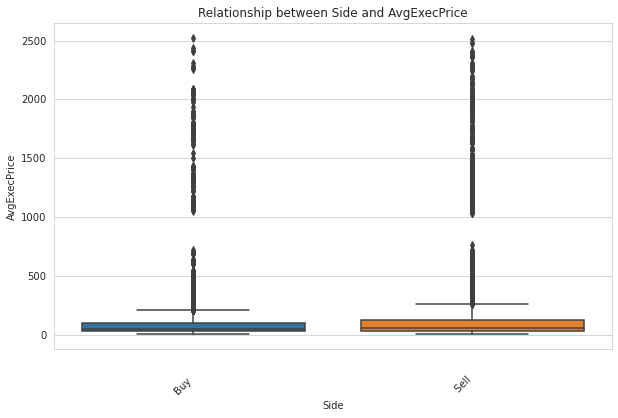

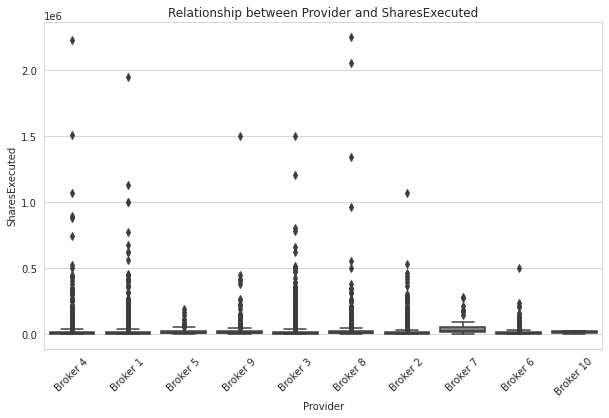

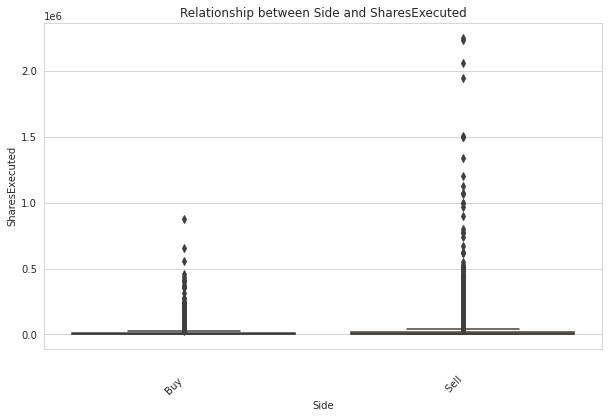

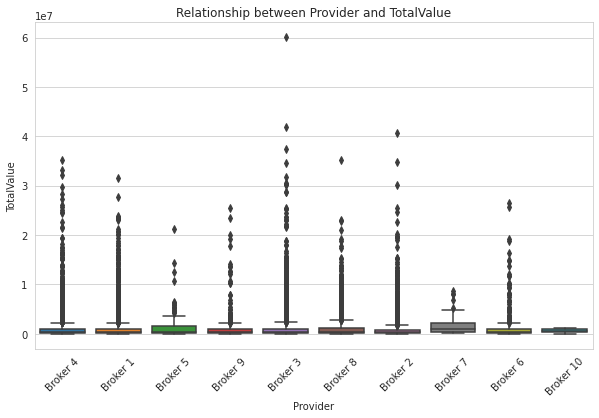

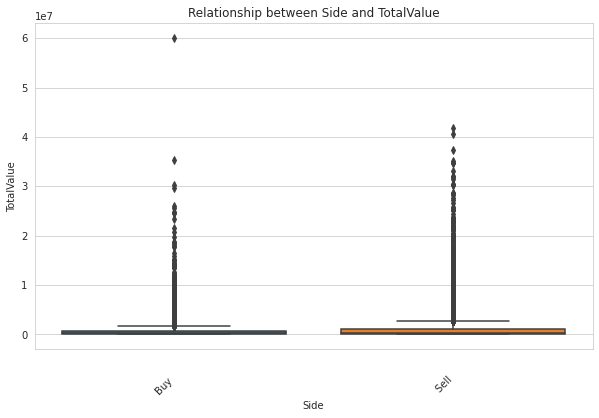

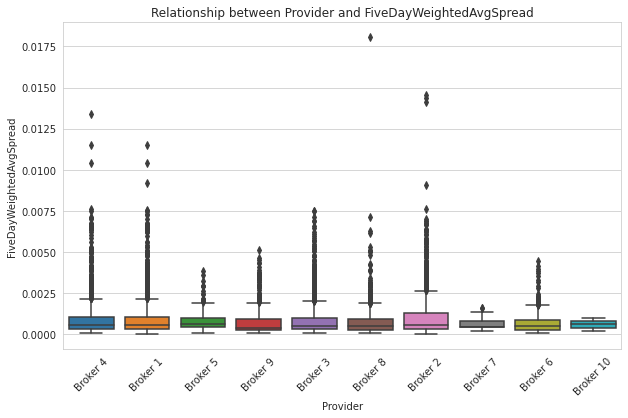

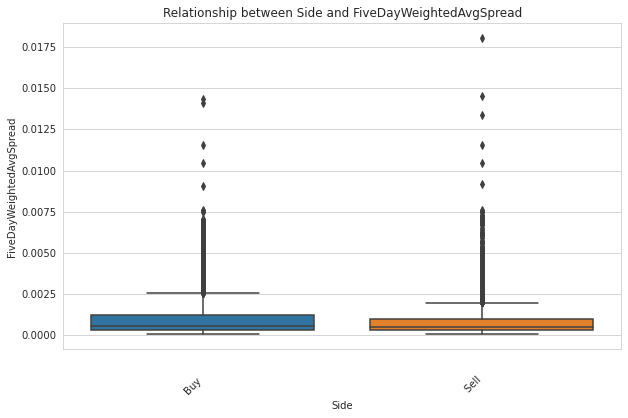

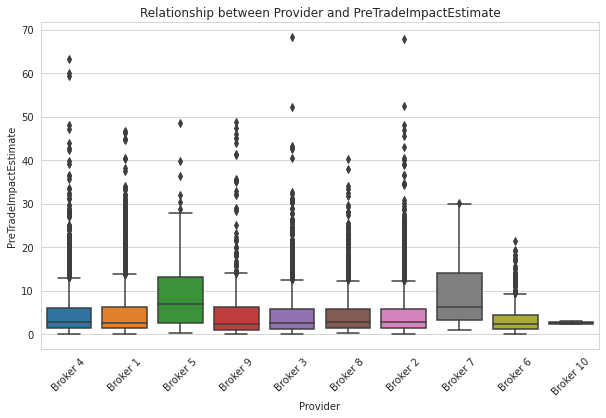

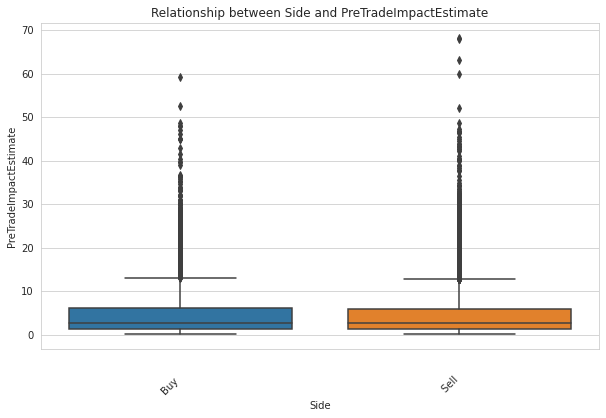

In [ ]:
# numerical features that make sense to me for the boxplot based on their meaning are AvgExecPrice, SharesExecuted,TotalValue,FiveDayWeightedAvgSpread and PreTradeImpactEstimate
numerical_features = [
    'AvgExecPrice',
    'SharesExecuted',
    'TotalValue',
    'FiveDayWeightedAvgSpread',
    'PreTradeImpactEstimate'
]

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Provider', y=feature, data=clean_df)
    plt.xticks(rotation=45)
    plt.title(f'Relationship between Provider and {feature}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Side', y=feature, data=clean_df)
    plt.xticks(rotation=45)
    plt.title(f'Relationship between Side and {feature}')
    plt.show()



In [ ]:
# Time and categorical features quaterly (why quarterly?)

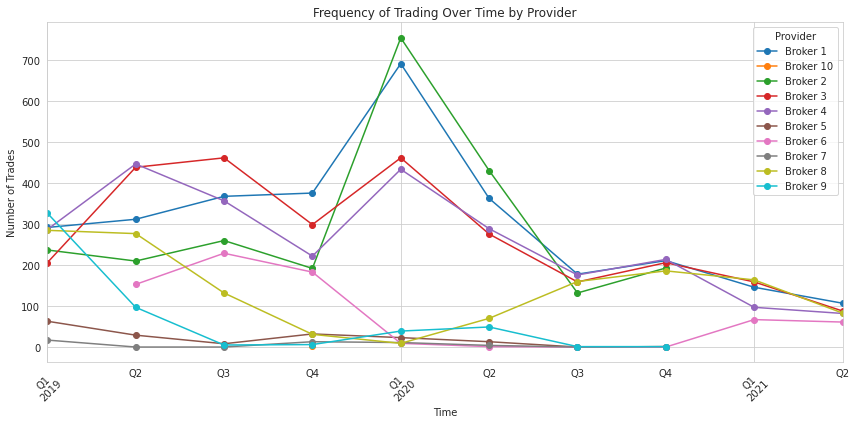

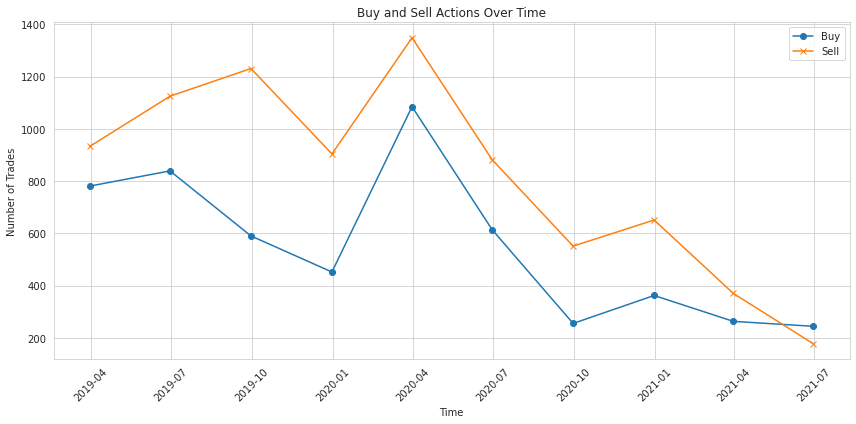

In [ ]:
time_cat_df=clean_df.copy()
time_cat_df.set_index('TradeDate', inplace=True)

provider_trades = time_cat_df.groupby('Provider').resample('Q').size()
provider_trades = provider_trades.unstack(level=0)

# Plotting frequency of trading over time by Provider
provider_trades.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Frequency of Trading Over Time by Provider')
plt.ylabel('Number of Trades')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.legend(title='Provider')
plt.tight_layout()
plt.show()

buy_trades = time_cat_df[time_cat_df['Side']== 'Buy         '].resample('Q').size()
sell_trades = time_cat_df[time_cat_df['Side']== 'Sell        '].resample('Q').size()

# Plotting Buy and Sell actions over time
plt.figure(figsize=(12, 6))
plt.plot(buy_trades.index, buy_trades, label='Buy', marker='o')
plt.plot(sell_trades.index, sell_trades, label='Sell', marker='x')
plt.title('Buy and Sell Actions Over Time')
plt.ylabel('Number of Trades')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#Time and numerical quaterly

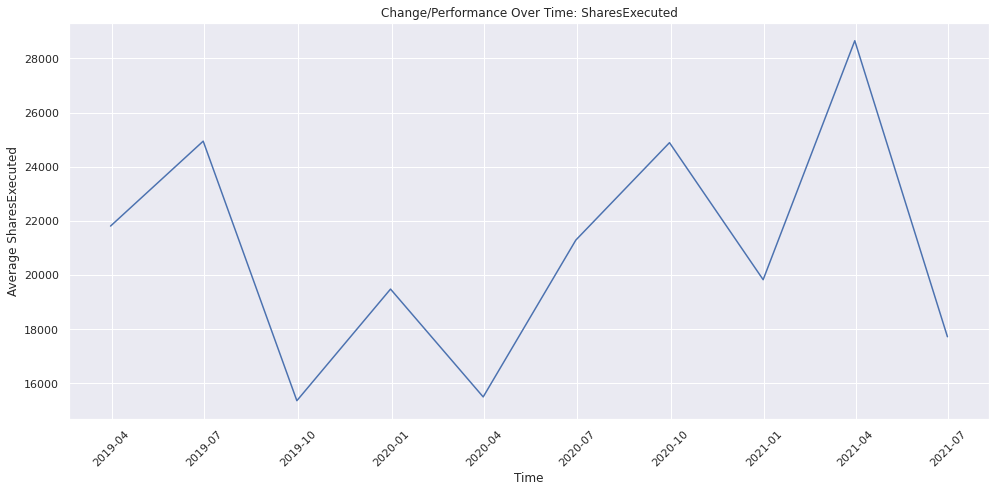

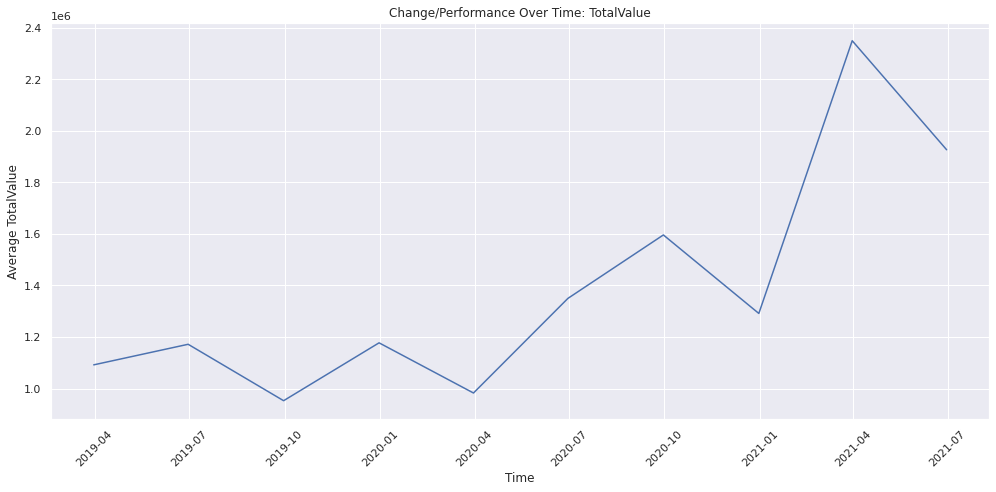

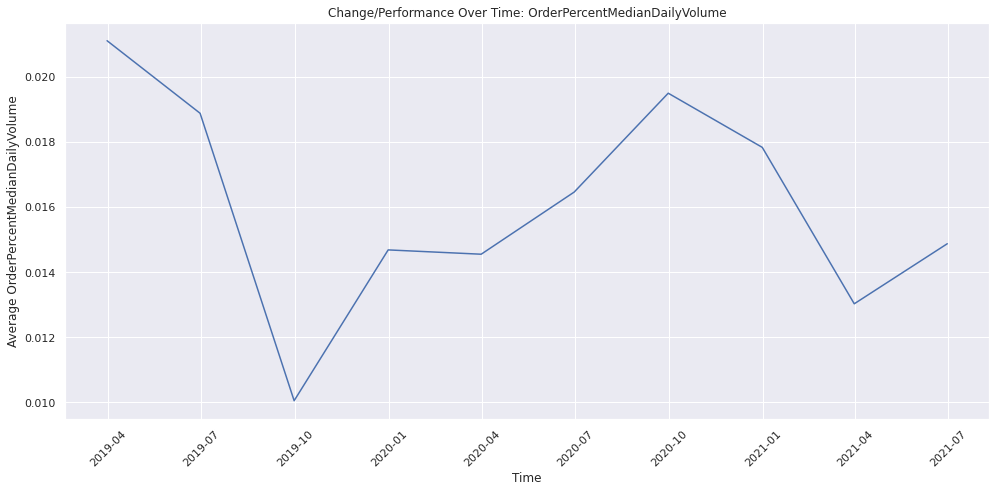

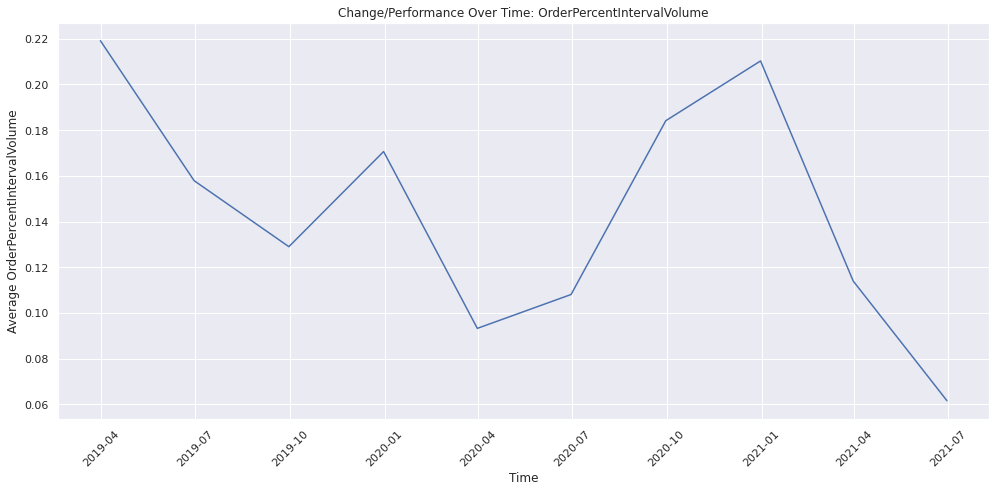

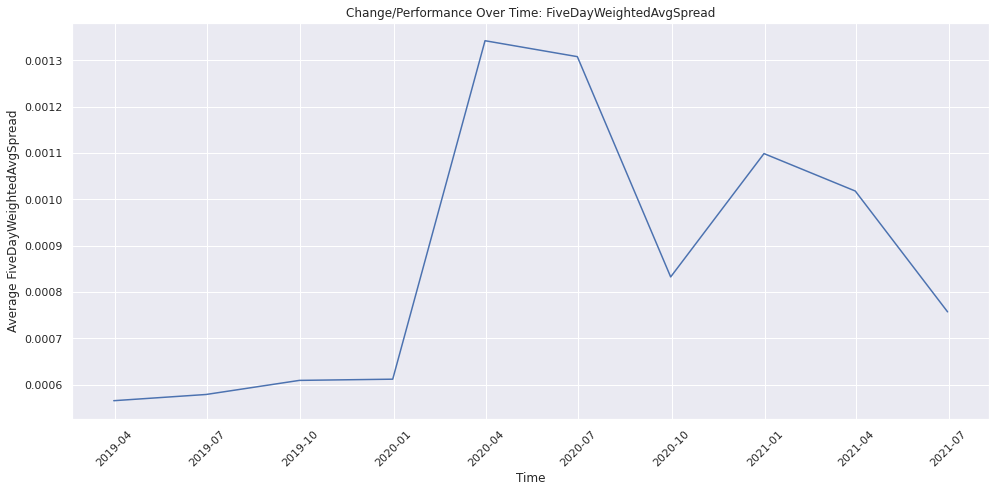

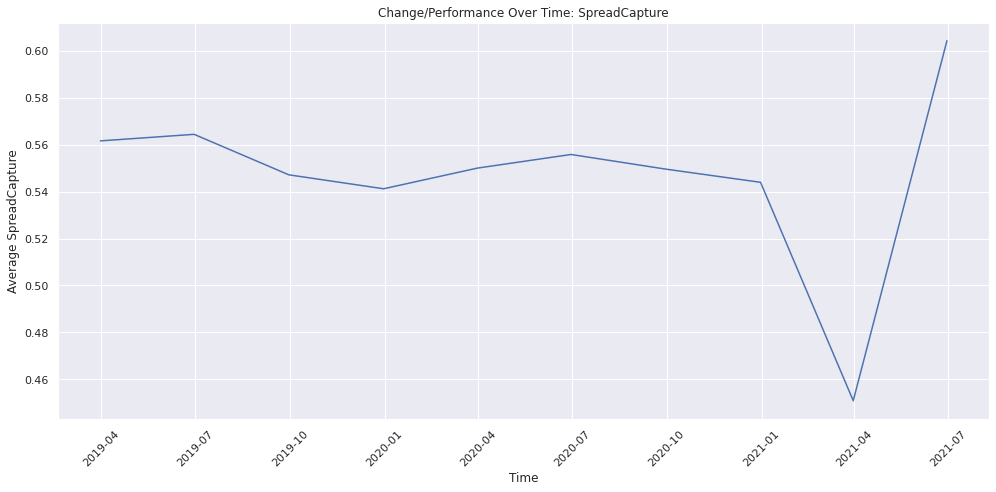

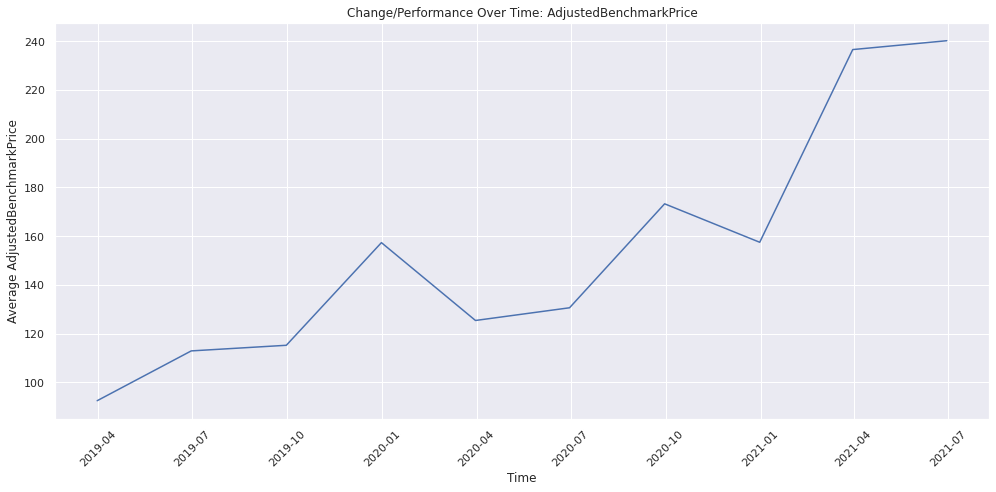

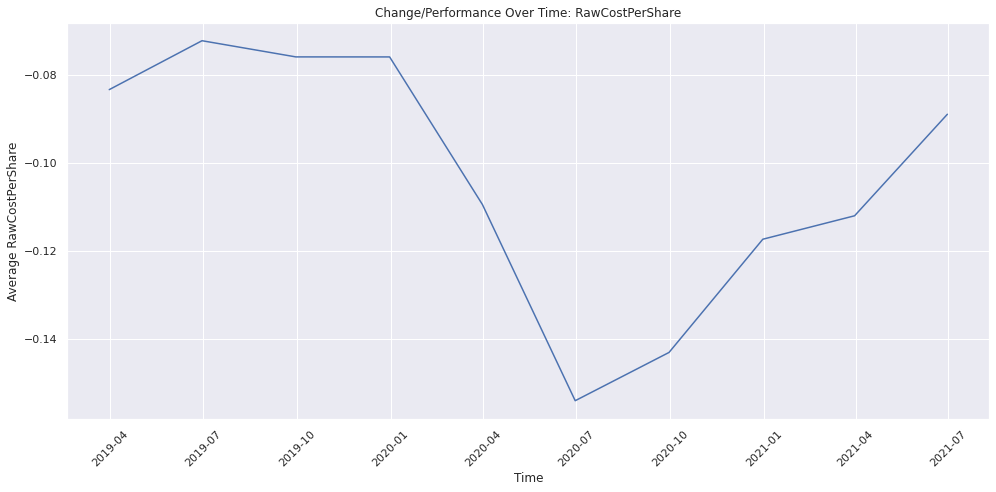

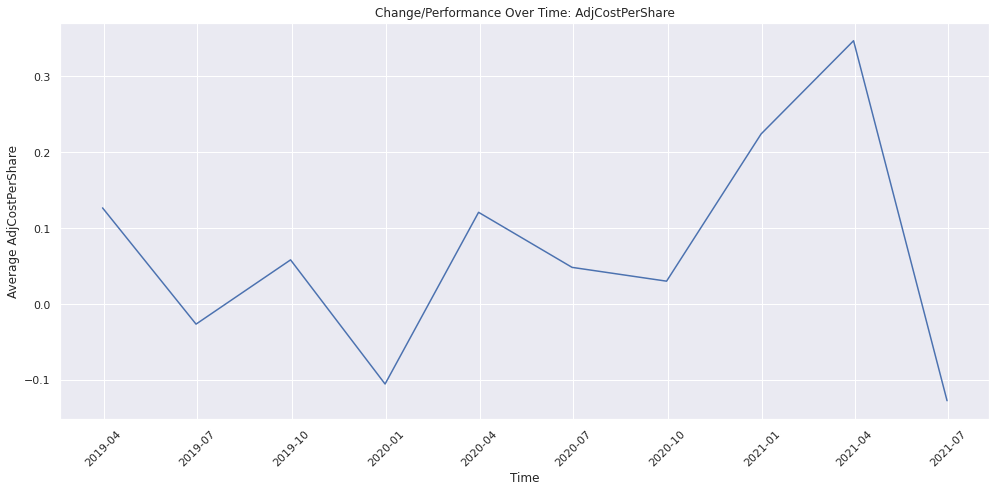

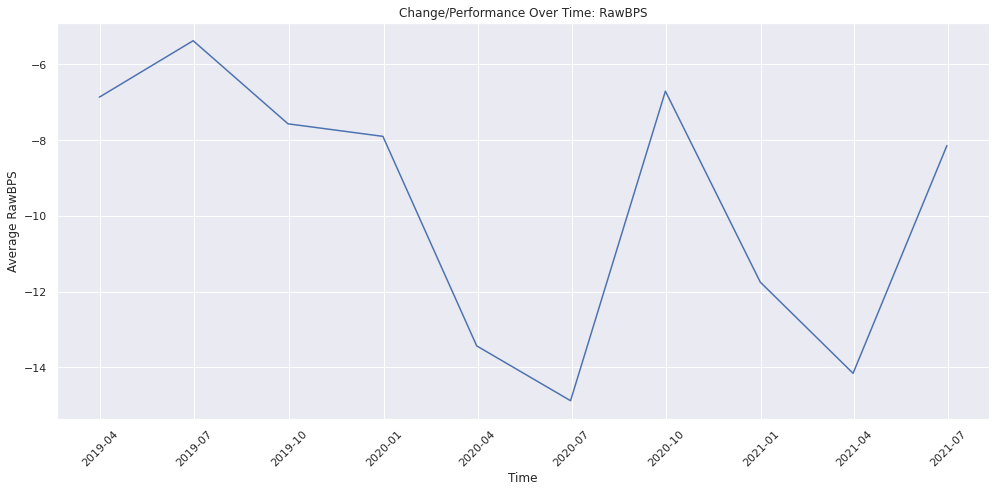

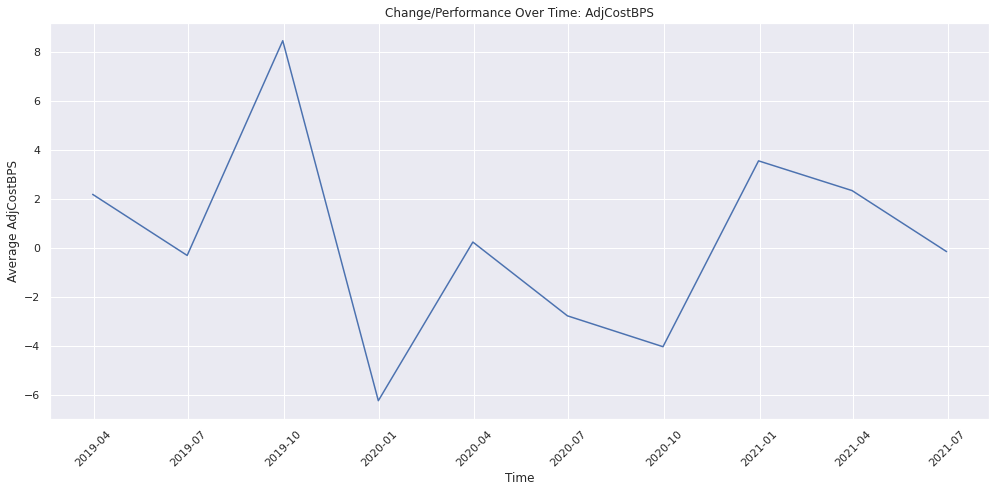

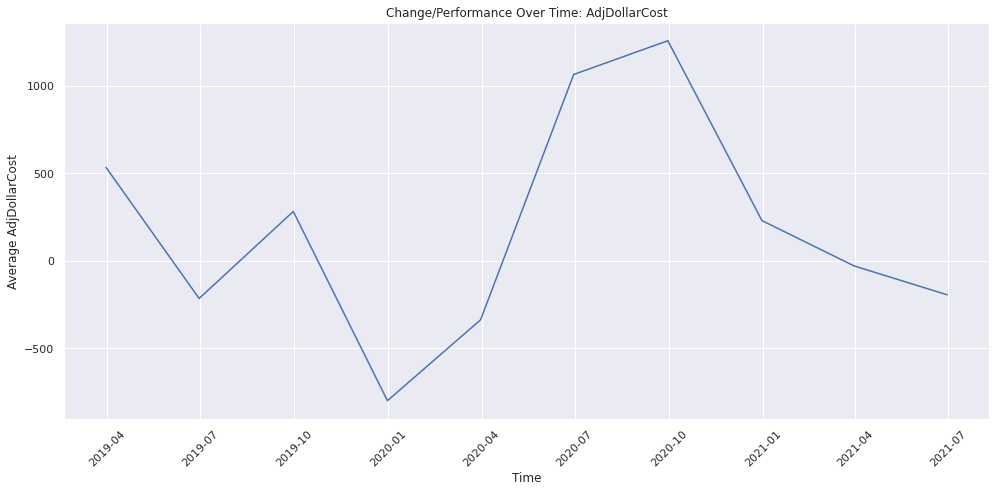

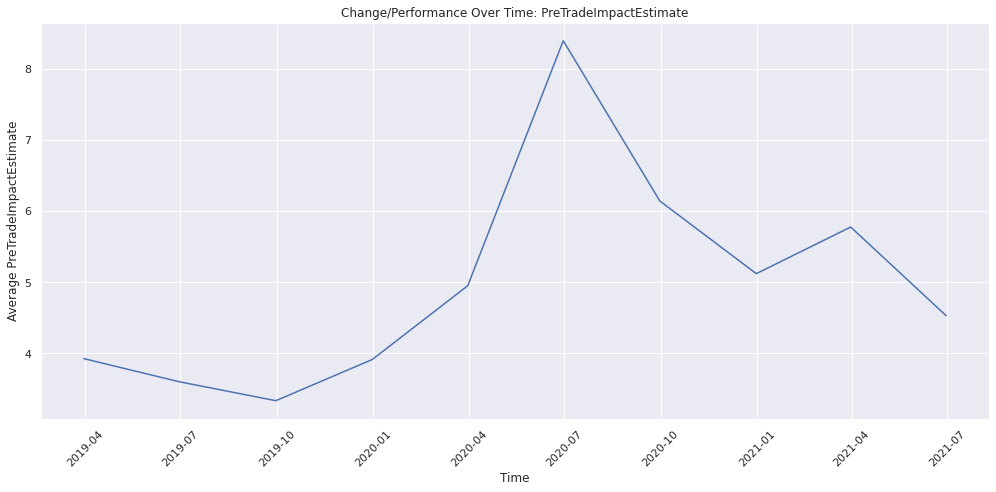

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style
sns.set(style="darkgrid")

numerical_df=clean_df.copy()
numerical_df.set_index('TradeDate', inplace=True)
# List of numerical features to plot
features_to_plot = [
    'SharesExecuted', 'TotalValue', 'OrderPercentMedianDailyVolume',
    'OrderPercentIntervalVolume', 'FiveDayWeightedAvgSpread', 'SpreadCapture',
    'AdjustedBenchmarkPrice', 'RawCostPerShare', 'AdjCostPerShare',
    'RawBPS', 'AdjCostBPS', 'AdjDollarCost', 'PreTradeImpactEstimate'
]

# Resample data to a larger time scale for a clearer plot, here we use monthly averages ('M')
# Adjust the resampling method as needed for your specific data and analysis
resampled_df = numerical_df[features_to_plot].resample('Q').mean()

# Plot each feature over time with improved aesthetics
for feature in features_to_plot:
    plt.figure(figsize=(14, 7))  # Increased figure size
    sns.lineplot(data=resampled_df, x=resampled_df.index, y=feature)
    plt.title(f'Change/Performance Over Time: {feature}')
    plt.ylabel('Average ' + feature)
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the padding between and around subplots
    plt.show()


Maybe add a summary? like your understanding of data? like in the two years how the trading was or something else that makes more sense

Now that I have more understanding of the data and the features, I would like to analyse the data and answer some questions.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming clean_df is your DataFrame

clean_df_cost = clean_df.copy()
clean_df_cost.reset_index(drop=True, inplace=True)




In [ ]:
def categorize_time_of_day(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

clean_df_cost['TimeOfDay'] = clean_df_cost['Hour'].apply(categorize_time_of_day)




In [ ]:
clean_df_cost

Stock ID          Side  OrderID       ReleasedDateLocal     ReleaseID  \
0           113  Buy            123902 2019-01-02 09:32:39.740  113.25nvs.49   
1           115  Buy            123903 2019-01-02 09:32:02.097  115.25nvs.48   
2           127  Buy            123905 2019-01-02 09:20:19.113  127.25nvs.3w   
3           127  Buy            123905 2019-01-02 13:26:37.847  127.25nvs.96   
4           146  Buy            123907 2019-01-02 09:19:35.553  146.25nvs.3u   
...         ...           ...      ...                     ...           ...   
13653       265  Buy            228026 2021-06-30 13:01:32.640  265.k9frv.7n   
13654       318  Buy            228031 2021-06-30 13:08:29.967  318.k9frv.87   
13655       192  Buy            228032 2021-06-30 13:08:29.983  192.k9frv.89   
13656       264  Buy            228033 2021-06-30 13:08:29.967  264.k9frv.88   
13657       103  Buy            228064 2021-06-30 15:37:32.860  103.k9frv.bt   

      OrderStartDateLocal       OrderEndDateLocal  TradeDate  AvgExecPrice  \
0     2019-01-02 09:03:16 2019-01-02 16:03:41.833 2019-01-02       70.8078   
1     2019-01-02 09:03:16 2019-01-02 13:15:33.597 2019-01-02       77.1668   
2     2019-01-02 09:03:16 2019-01-02 14:41:35.000 2019-01-02       39.1712   
3     2019-01-02 09:03:16 2019-01-02 14:41:35.000 2019-01-02       39.5539   
4     2019-01-02 09:19:35 2019-01-02 15:59:45.343 2019-01-02       30.0310   
...                   ...                     ...        ...           ...   
13653 2021-06-30 13:01:27 2021-06-30 14:57:05.277 2021-06-30       35.1240   
13654 2021-06-30 13:08:29 2021-06-30 15:59:29.517 2021-06-30       67.0297   
13655 2021-06-30 13:08:29 2021-06-30 13:56:02.000 2021-06-30      135.5051   
13656 2021-06-30 13:08:29 2021-06-30 16:02:57.747 2021-06-30       40.2821   
13657 2021-06-30 15:37:27 2021-06-30 15:54:00.377 2021-06-30       49.7827   

       SharesExecuted  ...  AdjCostBPS  AdjDollarCost  PreTradeImpactEstimate  \
0               55185  ...     15.9462    6221.097961                 12.7634   
1                5723  ...    -36.1756   -1547.156169                  7.4185   
2               65853  ...     71.8921   18407.925570                  6.6369   
3               43919  ...      0.7155     123.933988                  4.7236   
4               57896  ...    -25.7369   -4286.098783                 30.3586   
...               ...  ...         ...            ...                     ...   
13653           14100  ...      8.4968     420.336666                  1.4890   
13654           42330  ...    -30.2023   -8536.314083                 13.7595   
13655            8500  ...    -13.1292   -1511.836025                  3.5901   
13656           32100  ...    -47.3749   -6086.431602                  8.4834   
13657            7400  ...    -13.3612    -492.088552                  2.5605   

        OrderValue  Provider  Auto or Human Trader  Year  Month  Hour  \
0      3901303.575  Broker 4                 Human  2019      1     9   
1       427679.790  Broker 4                 Human  2019      1     9   
2      2560492.592  Broker 1                 Human  2019      1     9   
3      1732165.360  Broker 1                 Human  2019      1    13   
4      1665349.666  Broker 5                 Human  2019      1     9   
...            ...       ...                   ...   ...    ...   ...   
13653   494698.500  Broker 4                 Human  2021      6    13   
13654  2826374.100  Broker 4                 Human  2021      6    13   
13655  1151511.150  Broker 1                 Human  2021      6    13   
13656  1284738.300  Broker 3                 Human  2021      6    13   
13657   368298.000  Broker 4                 Human  2021      6    15   

       TimeOfDay  
0        Morning  
1        Morning  
2        Morning  
3      Afternoon  
4        Morning  
...          ...  
13653  Afternoon  
13654  Afternoon  
13655  Afternoon  
13656  Afternoon  
13657  Afternoon  

[13658 rows x 29 columns]

In [ ]:
# One-hot encoding for TimeOfDay
one_hot_encoder = OneHotEncoder()
time_of_day_encoded = one_hot_encoder.fit_transform(clean_df_cost[['TimeOfDay']]).toarray()


In [ ]:
# First, check the shape of your encoded array
print(time_of_day_encoded.shape)  # Should output (13658, 2)

# Then, check the number of feature names generated
print(len(one_hot_encoder.get_feature_names_out()))  # Should output 2 if it matches the encoded array

# Ensure that you are generating the correct number of feature names
# The number of feature names should match the second dimension of your encoded array
time_of_day_encoded_df = pd.DataFrame(time_of_day_encoded,
                                      columns=one_hot_encoder.get_feature_names_out()[:2])


(13658, 2)
2


In [ ]:
time_of_day_encoded_df

TimeOfDay_Afternoon  TimeOfDay_Morning
0                      0.0                1.0
1                      0.0                1.0
2                      0.0                1.0
3                      1.0                0.0
4                      0.0                1.0
...                    ...                ...
13653                  1.0                0.0
13654                  1.0                0.0
13655                  1.0                0.0
13656                  1.0                0.0
13657                  1.0                0.0

[13658 rows x 2 columns]

In [ ]:
provider_encodeded= one_hot_encoder.fit_transform(clean_df_cost[['Provider']]).toarray()


In [ ]:
provider_encoded_df=pd.DataFrame(provider_encodeded,
                                      columns=one_hot_encoder.get_feature_names_out(['Provider']))

# Reset index of time_of_day_encoded_df
time_of_day_encoded_df.reset_index(drop=True, inplace=True)
provider_encoded_df.reset_index(drop=True, inplace=True)



# Merge with the original DataFrame
clean_df_cost = pd.concat([clean_df_cost, time_of_day_encoded_df,provider_encoded_df], axis=1)

In [ ]:
clean_df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13658 entries, 0 to 13657
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Stock ID                       13658 non-null  int64         
 1   Side                           13658 non-null  object        
 2   OrderID                        13658 non-null  int64         
 3   ReleasedDateLocal              13658 non-null  datetime64[ns]
 4   ReleaseID                      13658 non-null  object        
 5   OrderStartDateLocal            13658 non-null  datetime64[ns]
 6   OrderEndDateLocal              13658 non-null  datetime64[ns]
 7   TradeDate                      13658 non-null  datetime64[ns]
 8   AvgExecPrice                   13658 non-null  float64       
 9   SharesExecuted                 13658 non-null  int64         
 10  TotalValue                     13658 non-null  float64       
 11  OrderPercentMed

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import shap


[17:32:21] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


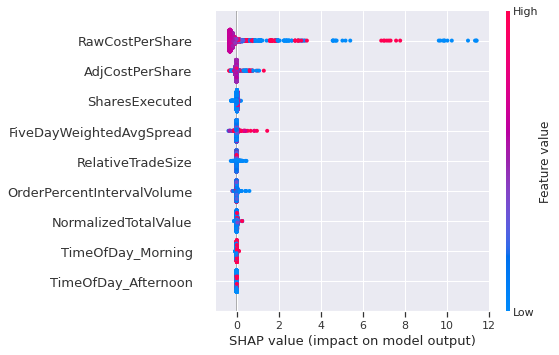

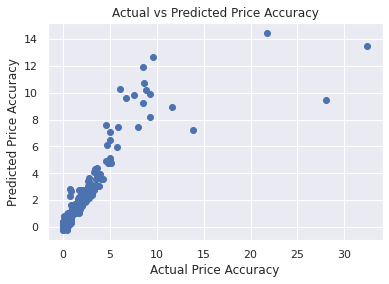

Mean Squared Error: 0.34137851317424484
R^2 Score: 0.7801875855417033


In [ ]:
# Continue with the rest of the feature engineering
clean_df_cost['PriceDifference'] = clean_df_cost['AvgExecPrice'] - clean_df_cost['AdjustedBenchmarkPrice']
clean_df_cost['PriceAccuracy'] = abs(clean_df_cost['PriceDifference'])
clean_df_cost['RelativeTradeSize'] = clean_df_cost['SharesExecuted'] / clean_df_cost['OrderPercentMedianDailyVolume']
clean_df_cost['NormalizedTotalValue'] = clean_df_cost['TotalValue'] / clean_df_cost['AvgExecPrice']

# Select features for regression model
selected_features = ['SharesExecuted',
                     'OrderPercentIntervalVolume', 'FiveDayWeightedAvgSpread',
                      'RawCostPerShare', 'AdjCostPerShare',
                     'RelativeTradeSize', 'NormalizedTotalValue',
                     'TimeOfDay_Morning', 'TimeOfDay_Afternoon']
X = clean_df_cost[selected_features]
y = clean_df_cost['PriceAccuracy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6,
                             learning_rate = 0.5, max_depth = 2, alpha = 10, n_estimators = 145)
# Assume 'model' is your trained machine learning model

# Fit the model
xgb_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(xgb_model)

# Predict
y_pred = xgb_model.predict(X_test)
shap_values = explainer.shap_values(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Plotting the results
shap.summary_plot(shap_values, X_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price Accuracy')
plt.ylabel('Predicted Price Accuracy')
plt.title('Actual vs Predicted Price Accuracy')
plt.show()

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Correlation between RawCostPerShare and AvgExecPrice: -0.21091402320611727
Correlation between RawCostPerShare and AdjustedBenchmarkPrice: -0.12556784271005111


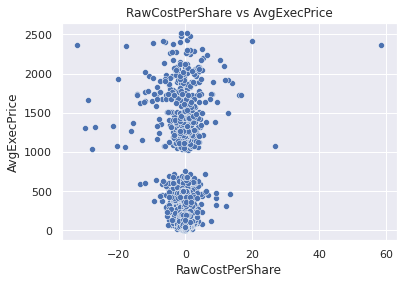

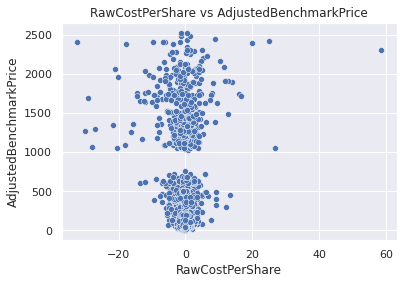

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming `df` is your DataFrame and it contains 'RawCostPerShare', 'AvgExecPrice', and 'AdjustedBenchmarkPrice'
# Calculate Pearson Correlation Coefficients
corr_avg_exec_price = pearsonr(clean_df_cost['RawCostPerShare'], clean_df_cost['PriceAccuracy'])[0]
corr_adj_benchmark_price = pearsonr(clean_df['RawCostPerShare'], clean_df['AdjustedBenchmarkPrice'])[0]

print(f"Correlation between RawCostPerShare and AvgExecPrice: {corr_avg_exec_price}")
print(f"Correlation between RawCostPerShare and AdjustedBenchmarkPrice: {corr_adj_benchmark_price}")

# Scatter plot for RawCostPerShare vs AvgExecPrice
sns.scatterplot(x='RawCostPerShare', y='AvgExecPrice', data=clean_df)
plt.title('RawCostPerShare vs AvgExecPrice')
plt.show()

# Scatter plot for RawCostPerShare vs AdjustedBenchmarkPrice
sns.scatterplot(x='RawCostPerShare', y='AdjustedBenchmarkPrice', data=df)
plt.title('RawCostPerShare vs AdjustedBenchmarkPrice')
plt.show()


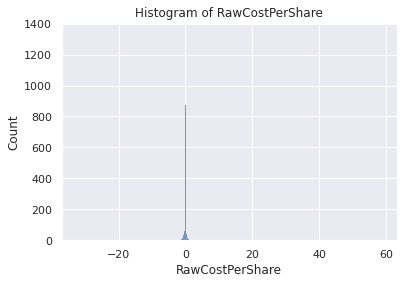

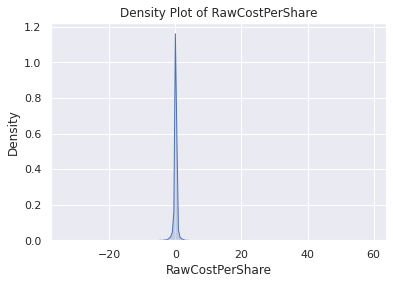

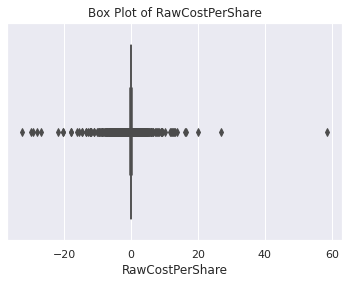

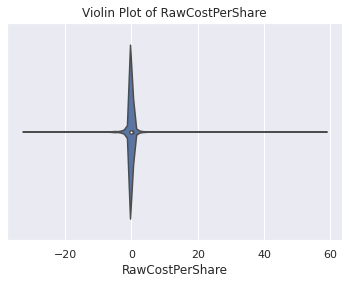

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a Pandas DataFrame with 'RawCostPerShare' as one of the columns
# Histogram
sns.histplot(clean_df['RawCostPerShare'], kde=False)
plt.title('Histogram of RawCostPerShare')
plt.show()

# Density Plot
sns.kdeplot(clean_df['RawCostPerShare'], shade=True)
plt.title('Density Plot of RawCostPerShare')
plt.show()

# Box Plot
sns.boxplot(x=clean_df['RawCostPerShare'])
plt.title('Box Plot of RawCostPerShare')
plt.show()

# Violin Plot
sns.violinplot(x=clean_df['RawCostPerShare'])
plt.title('Violin Plot of RawCostPerShare')
plt.show()


### Data Story

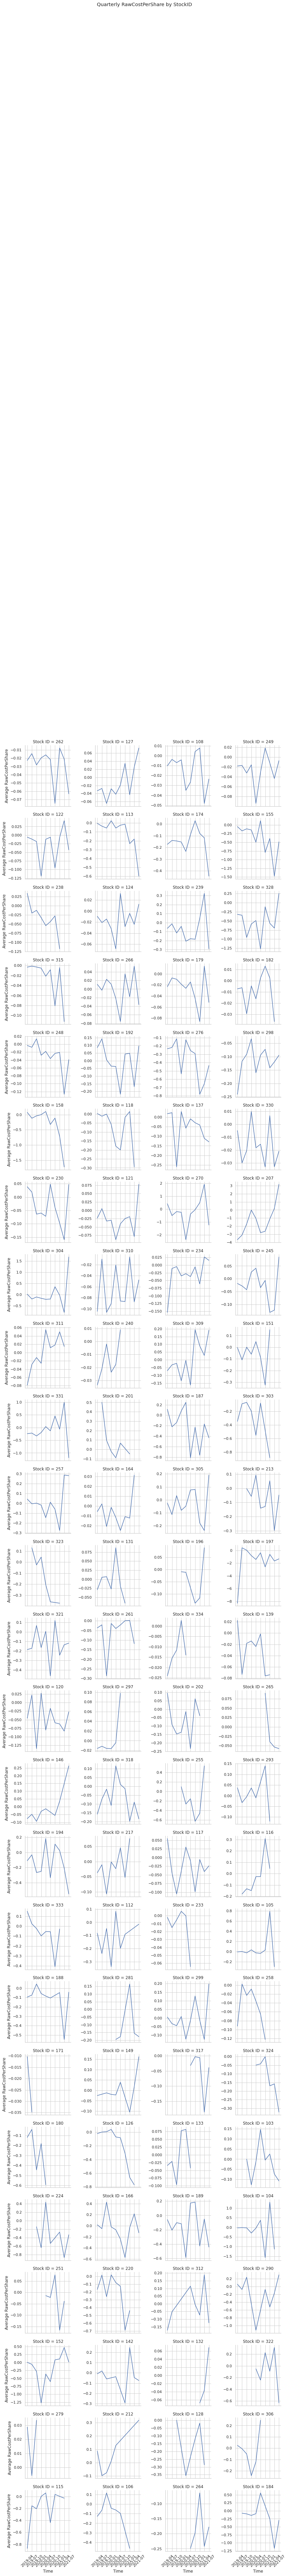

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stock_cost_df=clean_df.copy()
stock_cost_df.set_index('TradeDate', inplace=True)
top_stocks = stock_cost_df['Stock ID'].value_counts().head(100).index

top_100_df = stock_cost_df[stock_cost_df['Stock ID'].isin(top_stocks)]
rest_df = stock_cost_df[~stock_cost_df['Stock ID'].isin(top_stocks)]

combined_df = pd.concat([top_100_df, rest_df])

# Now group by 'StockID' and resample by quarter, then calculate the mean 'RawCostPerShare'
# This will keep the top 100 stocks at the top because they were concatenated first
quarterly_costs = combined_df.groupby('Stock ID').resample('Q')['RawCostPerShare'].mean().reset_index()

# Finally, use Seaborn's FacetGrid to create a grid of plots, ordered by frequency
# Note that this will create many plots if you have many unique StockIDs
g = sns.FacetGrid(quarterly_costs, col='Stock ID', col_wrap=4, sharey=False, col_order=top_stocks.tolist())
g.map(sns.lineplot, 'TradeDate', 'RawCostPerShare')

# Add a title and adjust the axis labels
g.fig.suptitle('Quarterly RawCostPerShare by StockID', y=1.4)
g.set_axis_labels('Time', 'Average RawCostPerShare')
g.set_xticklabels(rotation=45)

# Render the plot
plt.show()


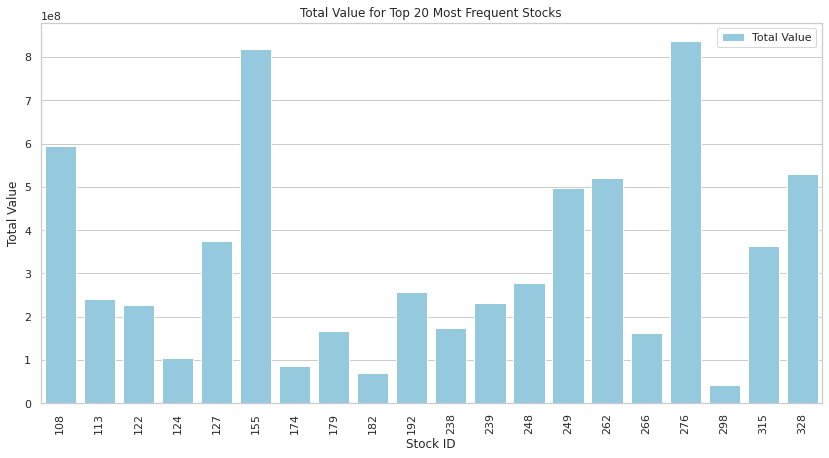

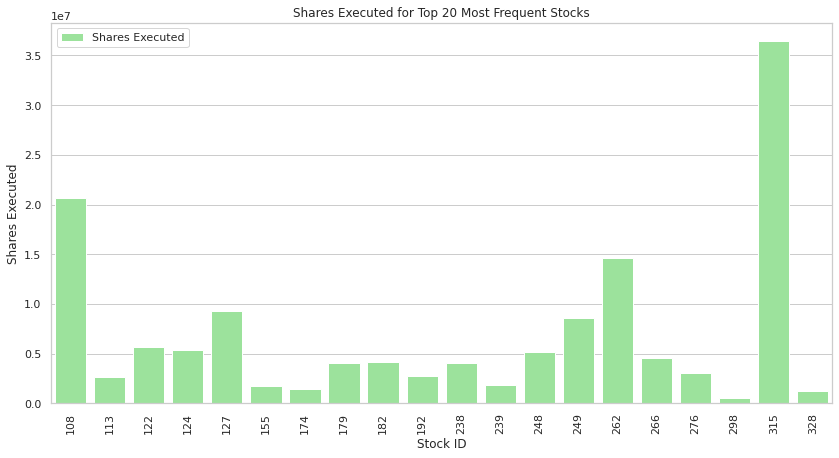

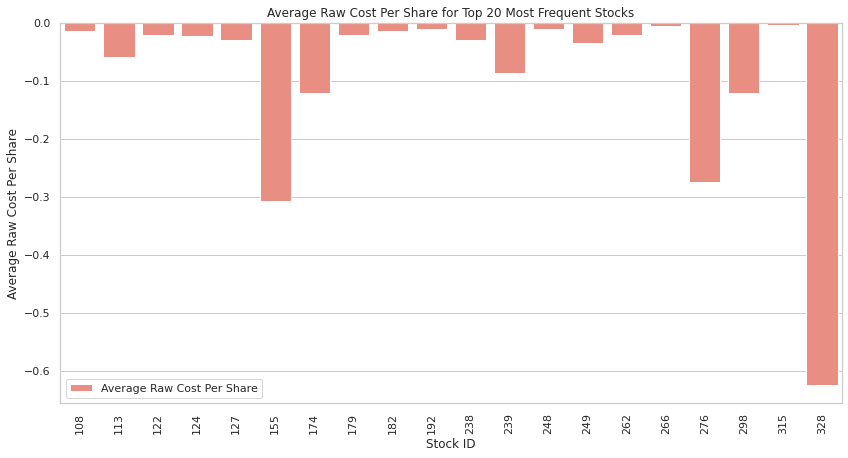

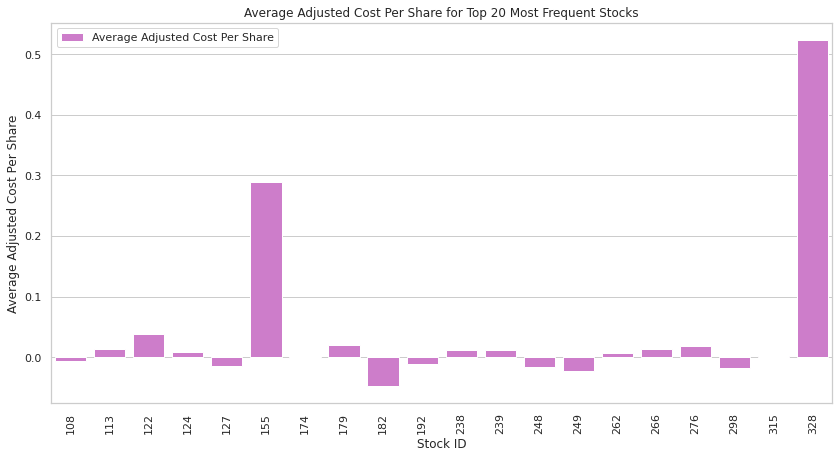

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the frequency of each StockID
stock_shares_df=clean_df.copy()
stock_freq = stock_shares_df['Stock ID'].value_counts().rename('Frequency')

# Aggregate the necessary information for each StockID
stock_summary = stock_shares_df.groupby('Stock ID').agg(
    TotalValue=pd.NamedAgg(column='TotalValue', aggfunc='sum'),
    SharesExecuted=pd.NamedAgg(column='SharesExecuted', aggfunc='sum'),
    AvgRawCost=pd.NamedAgg(column='RawCostPerShare', aggfunc='mean'),
    AvgAdjCost=pd.NamedAgg(column='AdjCostPerShare', aggfunc='mean')
).join(stock_freq)

# Sort the results by frequency for better visualization
stock_summary = stock_summary.sort_values(by='Frequency', ascending=False)

# Visualizing the top 20 stocks by frequency
top_20 = stock_summary.head(20)

# Plotting 'TotalValue' and 'SharesExecuted' for each 'Stock ID'
plt.figure(figsize=(14, 7))
sns.barplot(x=top_20.index, y='TotalValue', data=top_20, color='skyblue', label='Total Value')
plt.xticks(rotation=90)
plt.title('Total Value for Top 20 Most Frequent Stocks')
plt.ylabel('Total Value')
plt.xlabel('Stock ID')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x=top_20.index, y='SharesExecuted', data=top_20, color='lightgreen', label='Shares Executed')
plt.xticks(rotation=90)
plt.title('Shares Executed for Top 20 Most Frequent Stocks')
plt.ylabel('Shares Executed')
plt.xlabel('Stock ID')
plt.legend()
plt.show()

# Plotting 'RawCostPerShare' and 'AdjCostPerShare' for each 'Stock ID'
plt.figure(figsize=(14, 7))
sns.barplot(x=top_20.index, y='AvgRawCost', data=top_20, color='salmon', label='Average Raw Cost Per Share')
plt.xticks(rotation=90)
plt.title('Average Raw Cost Per Share for Top 20 Most Frequent Stocks')
plt.ylabel('Average Raw Cost Per Share')
plt.xlabel('Stock ID')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x=top_20.index, y='AvgAdjCost', data=top_20, color='orchid', label='Average Adjusted Cost Per Share')
plt.xticks(rotation=90)
plt.title('Average Adjusted Cost Per Share for Top 20 Most Frequent Stocks')
plt.ylabel('Average Adjusted Cost Per Share')
plt.xlabel('Stock ID')
plt.legend()
plt.show()
